In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_style("white")


#import plotly
#import plotly.graph_objs as go

import webcolors
from colorharmonies import Color, complementaryColor, triadicColor, splitComplementaryColor, tetradicColor, analogousColor, monochromaticColor

import cv2 #openCV library

from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import NearestNeighbors

#pd.set_option("display.max_rows", None)

# functions

### import photo OpenCV 

In [146]:
def import_photo(name:str): #defines what type to input
    interior_photo_1 = cv2.imread(f"images/{name}.jpg")
    interior_photo_1 = cv2.cvtColor(interior_photo_1, cv2.COLOR_BGR2RGB)
    return interior_photo_1 #the 3d nparray

In [347]:
import_photo("livingroom3")

array([[[252, 220, 207],
        [252, 220, 207],
        [252, 220, 207],
        ...,
        [247, 213, 201],
        [247, 213, 201],
        [247, 213, 201]],

       [[252, 220, 207],
        [252, 220, 207],
        [252, 220, 207],
        ...,
        [247, 213, 201],
        [247, 213, 201],
        [247, 213, 201]],

       [[252, 220, 207],
        [252, 220, 207],
        [252, 220, 207],
        ...,
        [247, 213, 201],
        [247, 213, 201],
        [247, 213, 201]],

       ...,

       [[229, 188, 156],
        [228, 187, 155],
        [227, 188, 157],
        ...,
        [240, 222, 208],
        [243, 224, 210],
        [248, 230, 216]],

       [[223, 183, 148],
        [224, 184, 149],
        [225, 184, 152],
        ...,
        [244, 228, 213],
        [247, 229, 215],
        [248, 232, 217]],

       [[216, 176, 141],
        [217, 177, 142],
        [219, 178, 146],
        ...,
        [247, 231, 216],
        [252, 236, 221],
        [249, 233, 218]]

### plot photo (show photo)

In [148]:
# can call show_photo(import_photo) to show photo imported in def import_photo

def show_photo(name:str):
    interior_photo_1 = cv2.imread(f"images/{name}.jpg")
    interior_photo_1 = cv2.cvtColor(interior_photo_1, cv2.COLOR_BGR2RGB)
    plt.axis('off')
    plt.imshow(interior_photo_1)

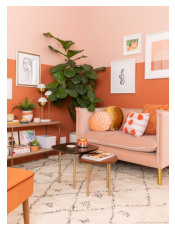

In [348]:
show_photo("livingroom3")

In [ ]:
# interior_photo_2d = interior_photo_1.reshape((-1,3)) #transform into 2d nparry

### get the RGB dataframe out of the photo

In [350]:
#import_photo(name:str)

def prepare_dataframe(name):
    interior_photo_1 = import_photo(name)
    interior_photo_2d = interior_photo_1.reshape((-1,3))
    interior_photo_1_df = pd.DataFrame(data=interior_photo_2d, columns=["Red", "Green", "Blue"])
    print (len(interior_photo_1_df[["Red", "Green", "Blue"]]))
    return interior_photo_1_df[["Red", "Green", "Blue"]]


In [351]:
prepare_dataframe("livingroom3")

428640


,Red,Green,Blue
0,252,220,207
1,252,220,207
2,252,220,207
3,252,220,207
4,252,220,207
...,...,...,...
428635,243,224,210
428636,240,222,208
428637,247,231,216
428638,252,236,221


In [ ]:
len()

### elbow plot to check optimal amount of clusters

In [90]:
# interior_photo_1_df = pd.DataFrame(data=interior_photo_2d, columns=["Red", "Green", "Blue"]) --SAME as X
# X = interior_photo_1_df[["Red", "Green", "Blue"]] - the RGB values of the imported photo

# name 'interior_photo_1' is not defined
#interior_photo_2d = interior_photo_1.reshape((-1,3))
#interior_photo_1_df = pd.DataFrame(data=interior_photo_2d, columns=["Red", "Green", "Blue"])
#X = interior_photo_1_df[["Red", "Green", "Blue"]]

def plot_elbow(name):
    df = prepare_dataframe(name)
    inertias = {}   
    for k in range(1,8):
        cl = KMeans(n_clusters=k).fit(df)
        inertias[k] = cl.inertia_
    plt.figure(figsize=(10,6))
    sns.lineplot(x=list(inertias.keys()),
                 y=list(inertias.values()));
    plt.title("Optimal number of clusters");
    
#'interior_photo_2d' is not defined
#'X' is not defined

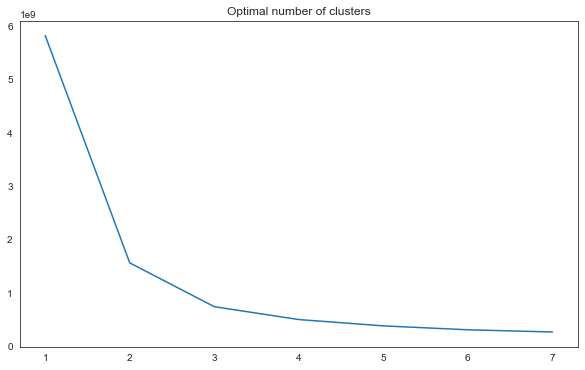

In [257]:
plot_elbow("livingroom4")

### prepare photo data for plotting

In [334]:
def df_preparation(name, K=3):
    
    #open_image = import_photo(name)

    #convert from 3darry to 2darry   
    #interior_photo_2d = open_image.reshape((-1,3)) 

    #create DF with RGB columns
    #interior_photo_1_df = pd.DataFrame(data=interior_photo_2d, columns=["Red", "Green", "Blue"]) #create dataframe

    #fit kmeans model
    #X = interior_photo_1_df[["Red", "Green", "Blue"]] ###SAME AS interior_photo_1_df
    
    df = prepare_dataframe(name)
    clusters = KMeans(K) #have to define the amount of clusters already before
    clusters.fit(df)
    
    #add fitted clusters as new column to DF
    X_clusters = df.assign(cluster=clusters.labels_) #add column with the clusters

    return X_clusters


#predict - labels_ 

In [335]:
df_preparation("livingroom1", 4)

,Red,Green,Blue,cluster
0,229,233,234,1
1,229,233,234,1
2,229,233,234,1
3,229,233,234,1
4,229,233,234,1
...,...,...,...,...
477139,217,219,216,1
477140,218,218,216,1
477141,218,218,216,1
477142,218,218,216,1


### plot clusters in 3d

In [340]:
def clusters_3d(name, K=4): #able to plot on prepared DF (+ input amount of clusters)
    df = prepare_dataframe(name)
    clusters = KMeans(K)
    clusters.fit(df)
    X_clusters = df_preparation(name, K)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    r = np.array(X_clusters["Red"])
    g = np.array(X_clusters["Green"])
    b = np.array(X_clusters["Blue"])
    
    ax.scatter(r,g,b, marker="s", c=X_clusters["cluster"], s=40, cmap="viridis")
    
    plt.figure(figsize=(12,12))
    plt.show()

    print(f"Inertia: {clusters.inertia_}")
    
#clusters = KMeans(K) - in def open_image = import_photo(name)

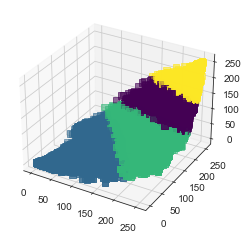

<Figure size 864x864 with 0 Axes>

Inertia: 501000515.10937524


In [346]:
clusters_3d("livingroom3", 4)

### Kmeans with OpenCV and define amount of clusters + show clusters in photo

In [143]:
def clusters_photo(name:str, K=3): #input "name of photo" and amount of clusters
    interior_photo_1 = import_photo(name) #call import_photo function
    pixels = interior_photo_1.reshape((-1,3))

    # convert to np.float32
    pixels = np.float32(pixels)

    # define criteria, number of clusters(K) and apply kmeans()
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    #K = 5 
    ret,label,center=cv2.kmeans(pixels,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    # Now convert back into uint8, and make original image
    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((interior_photo_1.shape))
    
    plt.axis('off')
    
    plt.imshow(res)
    plt.show()

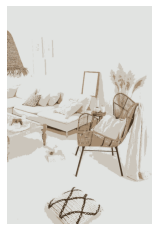

In [270]:
clusters_photo("livingroom1", 4)

### create cluster labels 

In [133]:
#to do - should give a list of cluster numbers

#def cluster_labels():
#    X = interior_photo_1_df[["Red", "Green", "Blue"]]
#    clusters = KMeans(n_clusters=5)
#    clusters.fit(X)
#    return clusters.labels_




# says it wont print it because too much data and might crash
# however before it was returning: [1 1 1 ... 0 0 0]

def cluster_labels(name, K=3):
    df = prepare_dataframe(name)
    clusters = KMeans(n_clusters=K)
    clusters.fit(df)
    labels = clusters.labels_
    labels = list(labels)
    return labels
#----------------

# returns [0 0 0 ... 4 4 4]

#X = interior_photo_1_df[["Red", "Green", "Blue"]]
#clusters = KMeans(n_clusters=5)
#clusters.fit(X)
#print(clusters.labels_)
#----------------

# are they the same
# list(clusters.labels_) == list(labels) TRUE
# list(clusters.labels_) != list(labels) FALSE

In [271]:
cluster_labels("livingroom1", 4)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### get centroids

In [343]:
#to do
# 5 clusters, 5 lists of centroids

def get_centroids(name, K=4):
    df = prepare_dataframe(name)
    clusters = KMeans(K)
    clusters.fit(df)
    centroids = clusters.cluster_centers_
    return np.round(centroids).astype(int) #need to round the centroids! get rid of the period!!

#def get_centroids(): #not sure what to input
#    centroids = clusters.cluster_centers_
#    return centroids

In [344]:
get_centroids("livingroom1")

array([[226, 227, 225],
       [166, 140, 113],
       [ 71,  53,  36],
       [204, 198, 188]])

In [272]:
#variable to use to get the color name
centroid_rgb = get_centroids("livingroom1", 4)

In [175]:
#for i in centroid_rgb:
#    print(tuple(i))

(223, 179, 158)
(94, 62, 30)
(201, 118, 78)
(242, 216, 204)


### percentages 

In [102]:
def get_percentage(name, K, centroids): 
    labels = cluster_labels(name, K)
    percent=[]
    for i in range(len(centroids)):
        labels = list(labels)
        j=labels.count(i)
        j=j/(len(labels))
        percent.append(j)
    return percent

#error: local variable 'labels' referenced before assignment

In [273]:
get_percentage("livingroom1", 4, centroid_rgb)

[0.7181752259276025,
 0.07146899049343594,
 0.023118806901061315,
 0.18723697667790018]

### pie chart

In [160]:
def plot_pie(name, K, centroids):
    percent = get_percentage(name, K, centroids)
    plt.pie(percent,colors=np.array(centroids/255),labels=np.arange(len(centroids)))
    plt.figure(figsize=(10,10))
    plt.show()

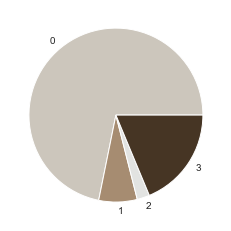

<Figure size 720x720 with 0 Axes>

In [276]:
plot_pie("livingroom1", 4, get_centroids("livingroom1", 4))

### RGB to HEX - is this necessary?

In [ ]:
from matplotlib.colors import rgb2hex

[rgb2hex((centroids/255)[i,:]) for i in range(len(centroids/255))]

#hex_code = [rgb2hex((centroids/255)[i,:]) for i in range(len(centroids/255))]

#RGBA values should be within 0-1 range : centroids / 255 which is RGB value

#double checking https://www.rapidtables.com/convert/color/hex-to-rgb.html



### Get color name

In [106]:
df = pd.read_csv("data/wikipedia_color_names.csv")
df_RGB = df[["name", "red", "green", "blue"]]
df_hex = df[["name", "hex"]]
hex_dict = dict(zip(df_hex["hex"], df_hex["name"]))


In [185]:
#https://stackoverflow.com/questions/9694165/convert-rgb-color-to-english-color-name-like-green-with-python
#https://pypi.org/project/webcolors/1.3/

def closest_colour2(requested_colour): #input RGB tuple. type of webcolors is dict_items()
    min_colours = {}
    for key, name in hex_dict.items(): #hex to rgb
        r, g, b = webcolors.hex_to_rgb(key) #works for any transformation
        red = (r - requested_colour[0]) ** 2 #kind of KNN but manually
        green = (g - requested_colour[1]) ** 2
        blue = (b - requested_colour[2]) ** 2
        min_colours[(red + green + blue)] = name #key rgb, value name
    return min_colours[min(min_colours.keys())] #find minimum distance to color

def get_colour_name2(requested_colour):
    rgb_to_hex = webcolors.rgb_to_hex(requested_colour)
    try:
        closest_name = actual_name = hex_dict[rgb_to_hex] #triyng to find the acutal name in list
    except KeyError:
        closest_name = closest_colour2(requested_colour) #name with minimum distance
        actual_name = None
    return actual_name, closest_name

# add for loop to access each rounded centroid of dominant color and store it
# create dataframe with column name
requested_colour = (223, 179, 158) #from centroids
    
actual_name, closest_name = get_colour_name2(requested_colour)

#print("Actual colour name:", actual_name, ", closest colour name:", closest_name)
print("Color name:", closest_name)

Color name: Pastel pink


In [311]:
def closest_colour2(requested_colour): #input RGB tuple. type of webcolors is dict_items()
    min_colours = {}
    for key, name in hex_dict.items(): #hex to rgb
        r, g, b = webcolors.hex_to_rgb(key) #works for any transformation
        red = (r - requested_colour[0]) ** 2 #kind of KNN but manually
        green = (g - requested_colour[1]) ** 2
        blue = (b - requested_colour[2]) ** 2
        min_colours[(red + green + blue)] = name #key rgb, value name
    return min_colours[min(min_colours.keys())] #find minimum distance to color

def get_colour_name2(requested_colour):
    rgb_to_hex = webcolors.rgb_to_hex(requested_colour)
    try:
        closest_name = actual_name = hex_dict[rgb_to_hex] #triyng to find the acutal name in list
    except KeyError:
        closest_name = closest_colour2(requested_colour) #name with minimum distance
        actual_name = None
    return closest_name

# add for loop to access each rounded centroid of dominant color and store it
# create dataframe with column name
#requested_colour = (241, 213, 201) #from centroids


get_df = {"rgb":[], "name":[]}

for i in centroid_rgb:
    get_df["rgb"].append(tuple(i))
    get_df["name"].append(get_colour_name2(i))
print(get_df["name"])
    
    
    
#    for val in get_df.values():
#        for item in val:
#            print(item)
    
#closest_name = get_df.loc[get_df["name"]]
    
#closest_name = get_colour_name2(requested_colour)

#print("Actual colour name:", actual_name, ", closest colour name:", closest_name)
#print("Color name:", closest_name)

['Pale silver', 'Platinum', 'Beaver', 'Café noir']


### pie plot with color names

In [297]:
def plot_pie22(name, K, centroids):
    percent = get_percentage(name, K, centroids) #dont call function again, store in variable and call it here
    labels = get_df["name"]
    plt.pie(percent,colors=np.array(centroids/255),labels=labels)
    plt.figure(figsize=(10,10))
    plt.show()

In [303]:

np.array(get_centroids("livingroom1", 4)/255)

array([[0.8       , 0.77647059, 0.7372549 ],
       [0.88627451, 0.89019608, 0.88235294],
       [0.27843137, 0.20784314, 0.14117647],
       [0.65098039, 0.54901961, 0.44313725]])

/Users/malonkraaijvanger/opt/anaconda3/envs/matrix/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  This is separate from the ipykernel package so we can avoid doing imports until


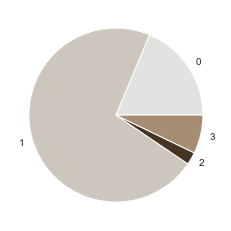

<Figure size 720x720 with 0 Axes>

In [321]:
plot_pie("livingroom1", 4, get_centroids("livingroom1", 4))

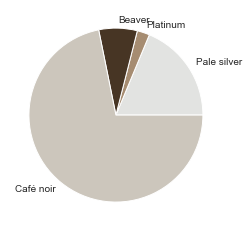

<Figure size 720x720 with 0 Axes>

In [330]:
plot_pie22("livingroom1", 4, get_centroids("livingroom1", 4))

### Complimentary color

In [113]:
#https://github.com/baptistemanteau/colorharmonies

# from library, building blocks:
# 1. input R G B values from centroid 
# 2. return R G B values of opposite
# 3. find color name or closest one
# 4. display color

def complementary_color():
    brown1 = Color([141, 127, 110],"","")
    return complementaryColor(brown1)



In [111]:
grey = Color([141, 127, 110],"","")
complementaryColor(grey)

[110, 124, 141]

In [310]:
#get the complementary color name

get_compl_df = {"rgb_compl":[], "name_compl":[]}

for i in centroid_rgb:
    compl_rgb = Color(i,"","")
#    print(complementaryColor(compl_rgb))
    #for i in complementaryColor(compl_rgb):
    get_compl_df["rgb_compl"].append(complementaryColor(compl_rgb))
    get_compl_df["name_compl"].append(get_colour_name2(complementaryColor(compl_rgb)))
print(get_compl_df["name_compl"])
#cant divide the library /255, so each item in output list /255



['Lavender gray', 'Platinum', 'Shadow blue', 'Japanese indigo']


In [328]:
#make into function

get_compl_df = {"rgb_compl":[], "name_compl":[]}

def get_complementary_name(i):
    for i in centroid_rgb:
        compl_rgb = Color(i,"","")
#    print(complementaryColor(compl_rgb))
    #for i in complementaryColor(compl_rgb):
        get_compl_df["rgb_compl"].append(complementaryColor(compl_rgb))
        get_compl_df["name_compl"].append(get_colour_name2(complementaryColor(compl_rgb)))
    return get_compl_df["name_compl"]
#cant divide the library /255, so each item in output list /255

In [329]:
get_complementary_name(i)

['Lavender gray', 'Platinum', 'Shadow blue', 'Japanese indigo']

In [323]:
#normal centroids
np.array(get_centroids("livingroom1", 4)/255)

array([[0.88627451, 0.89019608, 0.88235294],
       [0.27843137, 0.20784314, 0.14117647],
       [0.65098039, 0.54901961, 0.44313725],
       [0.8       , 0.77647059, 0.7372549 ]])

### plot compl colors pie chart -  not working yet

In [300]:
def plot_pie33(name, K, centroids):
    percent = get_percentage(name, K, centroids)
    labels = get_compl_df["name_compl"]
    plt.pie(percent,colors=complementaryColor((compl_rgb)/255),labels=labels)
    plt.figure(figsize=(10,10))
    plt.show()
    

#list comprehension to get all color names
[for i in range(len(centroids/255))

In [324]:
print(compl_rgb)

In [308]:
complementaryColor((compl_rgb))/255

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [301]:
plot_pie33("livingroom3", 4, get_centroids("livingroom3", 4))

TypeError: unsupported operand type(s) for /: 'Color' and 'int'